# My Capstone Project

<hr>

## __Project Name__ :   
# Survive in Bangalore

<hr>

### In my project I am going to share you some idea about exploring new places using foursquare api.   
### Introduction/Business Problem:
#### Suppose I have completed my Post Graduation in Statistics from Bhubaneswar, Odisha and moving to Bangalore for higher studies in Data science. Although you have much idea to survive in new places, asking to neighouberhood friends and your instructors also room-mate. But what if you havenot been to Bangalore prior to this, also you dont have bike to explore the new place. So dont worry about it, we have our friendly app foursquare to help us in our journey.    
#### Using the Developer option we can gather data from all over the BTM Layout Area of Bangaluru, and use the relevent data for our decission making purpose.
Right after Deciding Where to Study:   
. Search for Nearby ATM to Collect cash.   
. Search for Nearby PG.   
. Search for Hotels, Cafe near your location.   



<hr>

## Step: 1  
### Search for Nearby ATM and PG ?
<hr>

### Lets Begin our project by Importing Required packages

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

#!conda install -c conda-forge geopy --yes 
#! pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [2]:
CLIENT_ID = 'DIFB4NBGW2Q52A52H00ZYIODEVAQQAVE1KY5UWIABBS2VGDB' # your Foursquare ID
CLIENT_SECRET = 'MPI353I1EBJOZNL3ULJXFNA3EYJM5GQDRCGEAFJQ0KGNTKQV' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: DIFB4NBGW2Q52A52H00ZYIODEVAQQAVE1KY5UWIABBS2VGDB
CLIENT_SECRET:MPI353I1EBJOZNL3ULJXFNA3EYJM5GQDRCGEAFJQ0KGNTKQV


In [3]:
address = '1st Stage, BTM Layout'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

12.9171879 77.6088051


#### latitude= 12.9171879 
#### longitude=77.6088051

#### The Place where we are going to stay is in "BTM Layout" so lets set our Location and set the radious of 2 km

In [4]:
#search_query = 'Indian,solutions'
search_query = 'atm,pg'
radius = 2000
print(search_query + ' .... OK!')

atm,pg .... OK!


In [5]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=DIFB4NBGW2Q52A52H00ZYIODEVAQQAVE1KY5UWIABBS2VGDB&client_secret=MPI353I1EBJOZNL3ULJXFNA3EYJM5GQDRCGEAFJQ0KGNTKQV&ll=12.9171879,77.6088051&v=20180604&query=atm,pg&radius=2000&limit=30'

In [6]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d2893badb1d81002c42e6c9'},
 'response': {'venues': [{'id': '4fb283a27bebc1fb6507015d',
    'name': 'Kotak Mahindra Bank - ATM',
    'location': {'address': 'Shop No. 5 Ground Floor “Akshay Complex No. 1” PID No. 65-27-1 16th Main Road B.T.M. 2nd Stage 1st Phase Extension',
     'crossStreet': '16th Main Udupi Garden',
     'lat': 12.91612609915097,
     'lng': 77.6098762624273,
     'labeledLatLngs': [{'label': 'display',
       'lat': 12.91612609915097,
       'lng': 77.6098762624273}],
     'distance': 165,
     'postalCode': '560076',
     'cc': 'IN',
     'city': 'Bangalore',
     'state': 'Karnātaka',
     'country': 'India',
     'formattedAddress': ['Shop No. 5 Ground Floor “Akshay Complex No. 1” PID No. 65-27-1 16th Main Road B.T.M. 2nd Stage 1st Phase Extension (16th Main Udupi Garden)',
      'Bangalore 560076',
      'Karnātaka',
      'India']},
    'categories': [{'id': '4bf58dd8d48988d10a951735',
      'name': 'Bank',
      'pluralNam

In [7]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d10a951735', 'name': 'B...",False,4fb283a27bebc1fb6507015d,Shop No. 5 Ground Floor “Akshay Complex No. 1”...,IN,Bangalore,India,16th Main Udupi Garden,165,[Shop No. 5 Ground Floor “Akshay Complex No. 1...,"[{'label': 'display', 'lat': 12.91612609915097...",12.916126,77.609876,560076,Karnātaka,Kotak Mahindra Bank - ATM,v-1562940346
1,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",False,4fc377c4e4b06a3981d13063,Maruthi Layout,IN,Banglore,India,3rd Main,366,"[Maruthi Layout (3rd Main), Banglore, Karnātak...","[{'label': 'display', 'lat': 12.92038154602050...",12.920382,77.607986,NaN,Karnātaka,Paying Guest Hostel(PG),v-1562940346
2,"[{'id': '5032891291d4c4b30a586d68', 'name': 'A...",False,50604726e4b0d9a2f221902c,Sg Palya,IN,NaN,India,1st Cross Street,1857,"[Sg Palya (1st Cross Street), India]","[{'label': 'display', 'lat': 12.93381326848170...",12.933813,77.607380,NaN,NaN,Mohan Reddy's Pg,v-1562940346
3,"[{'id': '52f2ab2ebcbc57f1066b8b56', 'name': 'A...",False,5c2b49aaacc5f5002c581306,"No 1214, Near Dominos Pizza Road",IN,Bangalore,India,Btm Layout,281,"[No 1214, Near Dominos Pizza Road (Btm Layout)...","[{'label': 'display', 'lat': 12.914979934692, ...",12.914980,77.610062,560029,Karnātaka,Axis Bank ATM,v-1562940346
4,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",False,56d69117498e82920b369d03,NaN,IN,NaN,India,NaN,535,[India],"[{'label': 'display', 'lat': 12.917783, 'lng':...",12.917783,77.613700,NaN,NaN,Life Style PG,v-1562940346
5,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",False,557412e2498e17b865efe712,"#16, Venkateswara Layout",IN,"S.G.Palaya, Banglaore",India,1st Cross,1873,"[#16, Venkateswara Layout (1st Cross), S.G.Pal...","[{'label': 'display', 'lat': 12.93396049325498...",12.933960,77.607409,NaN,Karnātaka,SSSB PG,v-1562940346
6,"[{'id': '4bf58dd8d48988d10a951735', 'name': 'B...",False,518490e0498edeecfbbaadfc,NaN,IN,NaN,India,NaN,409,[India],"[{'label': 'display', 'lat': 12.91387089444316...",12.913871,77.610430,NaN,NaN,Allahabad Bank Atm,v-1562940346
7,"[{'id': '5032891291d4c4b30a586d68', 'name': 'A...",False,5221dde4498e569a0b14fbd3,NaN,IN,NaN,India,NaN,749,[India],"[{'label': 'display', 'lat': 12.92279052734375...",12.922791,77.612633,NaN,NaN,sln pg,v-1562940346
8,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",False,5880f589084be55c00a77fdb,#61/1,IN,Bangalore,India,"4th Main, Jai Bheema Nagar, BTM Layout 1st Stage",737,"[#61/1 (4th Main, Jai Bheema Nagar, BTM Layout...","[{'label': 'display', 'lat': 12.9185, 'lng': 7...",12.918500,77.615463,560068,Karnātaka,Shri Sai Bhavani PG,v-1562940346
9,"[{'id': '5032891291d4c4b30a586d68', 'name': 'A...",False,53a6d2d0498e56d9917a0d8b,Tavarekere,IN,Bangalore,India,NaN,759,"[Tavarekere, Bangalore 560029, Karnātaka, India]","[{'label': 'display', 'lat': 12.923989, 'lng':...",12.923989,77.609385,560029,Karnātaka,Emirates pg,v-1562940346


### keep only columns that include venue name, and anything that is associated with location

In [8]:
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]


In [9]:
dataframe_filtered.categories[0][0]['name']

'Bank'

### Filter the categories column

In [10]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [11]:
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

In [12]:
dataframe_filtered[['location.lat','location.lng']].head()

,location.lat,location.lng
0,12.916126,77.609876
1,12.920382,77.607986
2,12.933813,77.607380
3,12.914980,77.610062
4,12.917783,77.613700


In [13]:
dataframe_filtered.categories.unique()

array(['Bank', 'Residential Building (Apartment / Condo)',
       'Assisted Living', 'ATM', 'Hostel', None, 'Housing Development'],
      dtype=object)

#### Here we get our Data Frame to work with.

In [14]:
dataframe_filtered.head(2)

,name,categories,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,id
0,Kotak Mahindra Bank - ATM,Bank,Shop No. 5 Ground Floor “Akshay Complex No. 1”...,IN,Bangalore,India,16th Main Udupi Garden,165,[Shop No. 5 Ground Floor “Akshay Complex No. 1...,"[{'label': 'display', 'lat': 12.91612609915097...",12.916126,77.609876,560076,Karnātaka,4fb283a27bebc1fb6507015d
1,Paying Guest Hostel(PG),Residential Building (Apartment / Condo),Maruthi Layout,IN,Banglore,India,3rd Main,366,"[Maruthi Layout (3rd Main), Banglore, Karnātak...","[{'label': 'display', 'lat': 12.92038154602050...",12.920382,77.607986,NaN,Karnātaka,4fc377c4e4b06a3981d13063


In [15]:
import folium

#### Now Lets Plot the Map with required data Points

In [16]:
def placecol(i):
    switch={
        'Bank':'blue',
        'Residential Building (Apartment / Condo)':'green',
        'Assisted Living':'green', 
        'ATM':'lightblue', 
        'Hostel':'orange', 
        None:'green', 
        'Housing Development':'lightgreen',
        'Building':'green',
    }
    return switch.get(i)

In [17]:
df=dataframe_filtered

In [18]:
df.head(2)

,name,categories,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,id
0,Kotak Mahindra Bank - ATM,Bank,Shop No. 5 Ground Floor “Akshay Complex No. 1”...,IN,Bangalore,India,16th Main Udupi Garden,165,[Shop No. 5 Ground Floor “Akshay Complex No. 1...,"[{'label': 'display', 'lat': 12.91612609915097...",12.916126,77.609876,560076,Karnātaka,4fb283a27bebc1fb6507015d
1,Paying Guest Hostel(PG),Residential Building (Apartment / Condo),Maruthi Layout,IN,Banglore,India,3rd Main,366,"[Maruthi Layout (3rd Main), Banglore, Karnātak...","[{'label': 'display', 'lat': 12.92038154602050...",12.920382,77.607986,NaN,Karnātaka,4fc377c4e4b06a3981d13063


### ExcelR Solution 12.9172° N, 77.6142° E

{'orange', 'beige', 'blue', 'white', 'lightgreen', 'darkblue', 'darkred', 'darkgreen', 'cadetblue', 'pink', 'purple', 'lightblue', 'lightgrayblack', 'lightred', 'green', 'gray', 'darkpurple', 'red'}

In [19]:
Bangaluru = folium.Map(location=[latitude,longitude],zoom_start=15)
loc = folium.map.FeatureGroup()

for lt,ln,cat,nam in zip(df['location.lat'],df['location.lng'],df['categories'],df.name):
    loc.add_child(
        folium.CircleMarker(
            location=[lt,ln],
            color=placecol(cat),
            radious=5,
            fill=True,
            fill_color=placecol(cat),
            fill_opacity=0.6,
            popup=nam,
            
        )
    )
loc.add_child(
        folium.Marker(
            location=[12.9172,77.6142],
            popup='ExcelR Solutions',
            icon = folium.Icon(icon='book',color='darkblue')
          
        )
    )
Bangaluru.add_child(loc)

#### Here is the Map Showing :   
. Blue marks with ATM   
. Green marks with PG
. Yellow Marks are with 

<hr>   

<hr>   

## Step 2:   
### Next Step is to See the Reviews of those PG, Where to Stay ?   

<hr>

In [20]:
CLIENT_ID = 'DIFB4NBGW2Q52A52H00ZYIODEVAQQAVE1KY5UWIABBS2VGDB' # your Foursquare ID
CLIENT_SECRET = 'MPI353I1EBJOZNL3ULJXFNA3EYJM5GQDRCGEAFJQ0KGNTKQV' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: DIFB4NBGW2Q52A52H00ZYIODEVAQQAVE1KY5UWIABBS2VGDB
CLIENT_SECRET:MPI353I1EBJOZNL3ULJXFNA3EYJM5GQDRCGEAFJQ0KGNTKQV


In [21]:
df_pgid=dataframe_filtered.loc[
                   dataframe_filtered.name.str.contains('PG') | 
                   dataframe_filtered.name.str.contains('pg') | 
                   dataframe_filtered.name.str.contains('Pg'),['name','id','location.lat','location.lng']]

In [22]:
df_pgid.head()

,name,id,location.lat,location.lng
1,Paying Guest Hostel(PG),4fc377c4e4b06a3981d13063,12.920382,77.607986
2,Mohan Reddy's Pg,50604726e4b0d9a2f221902c,12.933813,77.607380
4,Life Style PG,56d69117498e82920b369d03,12.917783,77.613700
5,SSSB PG,557412e2498e17b865efe712,12.933960,77.607409
7,sln pg,5221dde4498e569a0b14fbd3,12.922791,77.612633


In [32]:
# For PG 1
venue_id = '5221dde4498e569a0b14fbd3' # ID of Harry's Italian Pizza Bar
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
url

'https://api.foursquare.com/v2/venues/5221dde4498e569a0b14fbd3?client_id=DIFB4NBGW2Q52A52H00ZYIODEVAQQAVE1KY5UWIABBS2VGDB&client_secret=MPI353I1EBJOZNL3ULJXFNA3EYJM5GQDRCGEAFJQ0KGNTKQV&v=20180604'

In [33]:
result = requests.get(url).json()
result
#result['response']['venue'].keys()

{'meta': {'code': 429,
  'errorType': 'quota_exceeded',
  'errorDetail': 'Quota exceeded',
  'requestId': '5d28944e8afbe0003aa7a187'},
 'response': {}}

In [25]:
df_pgid['Like'] = 0
df_pgid['contact'] = 'no number found'

In [ ]:
for i,j,k in zip(df_pgid.id,df_pgid.name,df_pgid.index) :
    venue_id = i 
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    result = requests.get(url).json()
    A=result['response']['venue']['likes']['count']
    B=result['response']['venue']['contact'] 
    df_pgid.loc[k,'Like'] = A
    df_pgid.loc[k,'contact'] = str(B)
    print(A,j,B)
    

#### Next Step is to See the Reviews of those PG, Where to Stay ?

In [ ]:
df_pgid.loc[df_pgid['Like']==1]

### Lets Create our Map Again   
#### Green marked pg are liked and yellow mark pg are never liked

In [35]:
Bangaluru = folium.Map(location=[latitude,longitude],zoom_start=15)
loc = folium.map.FeatureGroup()
for lt,ln,name,like in zip(df_pgid['location.lat'],df_pgid['location.lng'],df_pgid['name'],df_pgid['Like']):
    if like==1:
        col='green'
        r=7
    else:
        col='yellow'
        r=5
    loc.add_child(
        folium.CircleMarker(
            location=[lt,ln],
            color=col,
            radious=r,
            fill=True,
            fill_color=col,
            fill_opacity=0.6,
            popup=name,
            
        )
    )
Bangaluru.add_child(loc)

### Conclusion   
#### As Its India and less of us know about the Foursquare App, so due to less information, and no review in any PG. We conclude our step 2 with selecting those PG which are ever liked.

<hr>
<hr>

## Step 3:   
### Next Step is to See the Distance of those PG, From BTM Latout ?   

<hr>

In [36]:
df_PG=dataframe_filtered.loc[
                   dataframe_filtered.name.str.contains('PG') | 
                   dataframe_filtered.name.str.contains('pg') | 
                   dataframe_filtered.name.str.contains('Pg')]

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt

In [43]:
df_PG = df_PG.set_index('name')

In [45]:
df_PG[['location.distance']].head(2)

,location.distance
name,
Paying Guest Hostel(PG),366
Mohan Reddy's Pg,1857


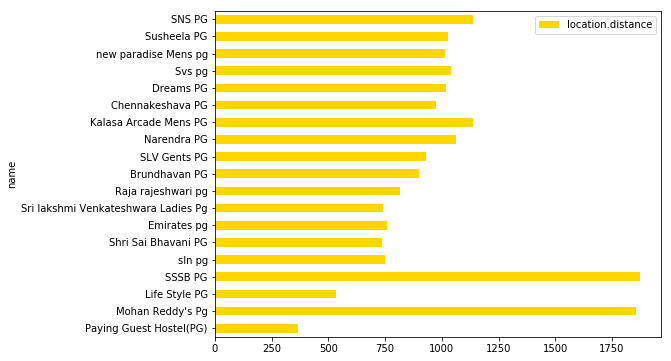

In [46]:
df_PG[['location.distance']].plot(kind='barh',figsize=(8,6),color='gold')


## Conclusion

#### Ok now having a mare look in oud data and the plot , we conclude that , we gonna live in Shri Sai Bhabani PG

## After more research This Project will continue.........................